# **WordCloud**
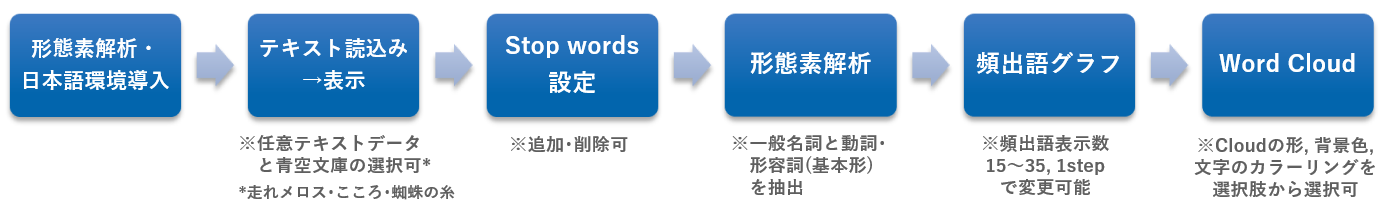
- テキストから一般名詞と動詞•形容詞の基本形を抽出し、stop wordを除く出現頻度の高い単語をグラフ及び WordCloud に表示します。
- WordCloudは、形状、背景、文字のカラーパターンをメニュー（ドロップダウン）切替だけで好みに変更できます。
- stop word も任意に追加することができます。
- メニューで青空文庫の書籍（走れメロス•こころ•蜘蛛の糸）を選択するとそれぞれのWordCloudを描くことができます。任意のテキストデータでWordCloudを描く時はメニューの Upload を選択してください。

# **形態素解析エンジン・日本語化環境導入**

オープンソースの日本語形態素解析エンジンMeCabをインストールします。

In [1]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.1 MB 368 kB/s 


In [2]:
#MeCabで形態素解析
import MeCab
mecab = MeCab.Tagger('-Ochasen')
data = mecab.parse('庭には２羽裏庭には２羽美しい鶏がいます。いわゆるBirdですね。youは信じてくれますか？')
print(data)

庭	ニワ	庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
２	ニ	２	名詞-数		
羽	ワ	羽	名詞-接尾-助数詞		
裏庭	ウラニワ	裏庭	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
２	ニ	２	名詞-数		
羽	ワ	羽	名詞-接尾-助数詞		
美しい	ウツクシイ	美しい	形容詞-自立	形容詞・イ段	基本形
鶏	ニワトリ	鶏	名詞-一般		
が	ガ	が	助詞-格助詞-一般		
い	イ	いる	動詞-自立	一段	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
いわゆる	イワユル	いわゆる	連体詞		
Bird	Bird	Bird	名詞-一般		
です	デス	です	助動詞	特殊・デス	基本形
ね	ネ	ね	助詞-終助詞		
。	。	。	記号-句点		
you	you	you	名詞-一般		
は	ハ	は	助詞-係助詞		
信じ	シンジ	信じる	動詞-自立	一段	連用形
て	テ	て	助詞-接続助詞		
くれ	クレ	くれる	動詞-非自立	一段・クレル	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
か	カ	か	助詞-副助詞／並立助詞／終助詞		
？	？	？	記号-一般		
EOS



In [3]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (16.7 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155673 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

Google Colaboratoryは日本語フォントを別途インストールしないと「▯」表示となります。日本語表示させるためIPAゴシックをインストールします。\
インストールしたフォントは/usr/share/fonts/truetype/fonts-japanese-gothic.ttfとして格納されています。フォントを使用する際にはこちらのファイルパスを指定します。

In [5]:
#matplotlibの日本語化
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 4.8 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c0e9ebcb9676a631164735fbcfb843052feeb82a5890c94a76ab7ae77beab117
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


# **テキスト読み込み**

**Select_Dataset** の dataset:▼ よりデータセットを選択してください。

**任意の textデータをアップロードする場合は [ Upload ]を選択**、青空文庫の書籍 [走れメロス] [こころ] [蜘蛛の糸] も選択できます。

In [18]:
#@title Select_Dataset { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：かならず 実行する前に 設定してください。**</font>

dataset = '\u3053\u3053\u308D' #@param ['走れメロス', 'こころ', '蜘蛛の糸', 'Upload']

#Load dataset
import re
from google.colab import files
import warnings
warnings.simplefilter('ignore')

if dataset =='Upload':
  from google.colab import files
  files = files.upload()
  file_name = list(files.keys())[0]
  contents = files[file_name].decode()

elif dataset == "走れメロス":
  #走れメロスのテキストデータ（zipファイル）をダウンロード
  !curl -O "https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip"
  #zipファイルを解凍
  !unzip 1567_ruby_4948.zip
  #文章切り出し（＝注釈削除 [冒頭削除：tail -n +**][末尾削除：head -n -**] 任意設定要）
  !tail -n +16 hashire_merosu.txt | head -n -14 > hashire_merosu_data.txt
  #テキストファイル読み込み
  text_file = open('/content/hashire_merosu_data.txt',encoding = 'shift_jis')
  contents = text_file.read()
  #《》や［］で囲まれるルビを除去
  contents = re.sub("《[^》]+》|［[^］]+］", "", contents)

elif dataset == "こころ":
  #こころのテキストデータ（zipファイル）をダウンロード
  !curl -O "https://www.aozora.gr.jp/cards/000148/files/773_ruby_5968.zip"
  #zipファイルを解凍
  !unzip 773_ruby_5968.zip
  #文章切り出し（＝注釈削除 [冒頭削除：tail -n +**][末尾削除：head -n -**] 任意設定要）
  !tail -n +18 kokoro.txt | head -n -16 > kokoro_data.txt
  #テキストファイル読み込み
  text_file = open('/content/kokoro_data.txt',encoding = 'shift_jis')
  contents = text_file.read()
  text_file.close()
  #《》や［］で囲まれるルビを除去
  contents = re.sub("《[^》]+》|［[^］]+］", "", contents)

elif dataset == "蜘蛛の糸":
  #蜘蛛の糸のテキストデータ（zipファイル）をダウンロード
  !curl -O "https://www.aozora.gr.jp/cards/000879/files/92_ruby_164.zip"
  #zipファイルを解凍
  !unzip 92_ruby_164.zip
  #文章切り出し（＝注釈削除 [冒頭削除：tail -n +**][末尾削除：head -n -**] 任意設定要）
  !tail -n +18 kumono_ito.txt | head -n -15 > kumono_ito_data.txt
  #テキストファイル読み込み
  text_file = open('/content/kumono_ito_data.txt',encoding = 'shift_jis')
  contents = text_file.read()
  text_file.close()
  #《》や［］で囲まれるルビを除去
  contents = re.sub("《[^》]+》|［[^］]+］", "", contents)

print('------------------------------------------------------------------------------------')
#テキスト表示
print(contents)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  150k  100  150k    0     0  90139      0  0:00:01  0:00:01 --:--:-- 90086
Archive:  773_ruby_5968.zip
Made with MacWinZipper™
replace kokoro.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: kokoro.txt              
------------------------------------------------------------------------------------
上　先生と私


一

　私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
　私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書を受け取ったので、私は多少の金を工面して、出掛ける事にした。私は金の工面に二、三日を費やした。ところが私が鎌倉に着いて三日と経たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧まない結婚を強いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。け

# **形態素解析と頻出語のグラフ化**

- MeCabを利用した形態素解析を行います。抽出する品詞は「名詞(一般)、動詞・形容詞(基本形)」としています。
- **stop_words** は抽出対象としない語の指定です。デフォルトで設定していますが追加も削除も可能です。
- 表示されるグラフは、頻出が多い語順に描いた棒グラフです。

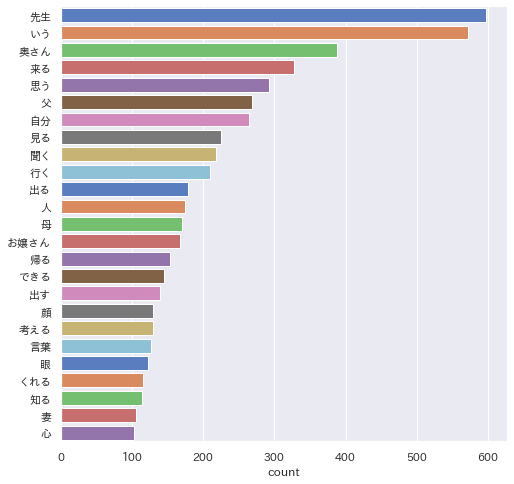

In [14]:
#@title stop_words & graph Settings  { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：実行する前に 設定してください。**</font> ※stop_words:表示させない単語, Number_of_words_to_display_in_graph:グラフに表示する頻出語数
stop_words = ["し","い","ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる"] #@param {type:"raw"}
Number_of_words_to_display_in_graph = 25 #@param {type:"slider", min:15, max:35, step:1}

#品詞抽出 → 出現回数の多い品詞をグラフ化
import MeCab
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 

#MeCabで形態素解析
mecab = MeCab.Tagger('-Ochasen')
node = mecab.parseToNode(contents)
words = []

while node is not None:
    #品詞と品詞細分類１を抽出
    pos_type = node.feature.split(',')[0]
    subtype = node.feature.split(',')[1]
    features = node.feature.split(",")

    #品詞が名詞[表層型]、品詞細分類１が一般のとき
    if pos_type in ['名詞']:
        if subtype in ['一般']:
            words.append(node.surface)

    #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
    elif pos_type in ['動詞','形容詞'] and not (features[6] in stop_words):
            words.append(features[6])

    node = node.next

#出現回数を集計し、最頻順にソート
words_count = Counter(words)
result = words_count.most_common()

#出現回数結果の画面出力
#for word, cnt in result:
#    print(word, cnt)

#出現回数の多い品詞 上位20語をグラフ化
import japanize_matplotlib
import seaborn as sns

sns.set(font='IPAexGothic')
fig = plt.subplots(figsize=(8, 8))
 
sns.countplot(y = words, order=[i[0] for i in words_count.most_common(25)],palette="muted")

# **WordCloud**

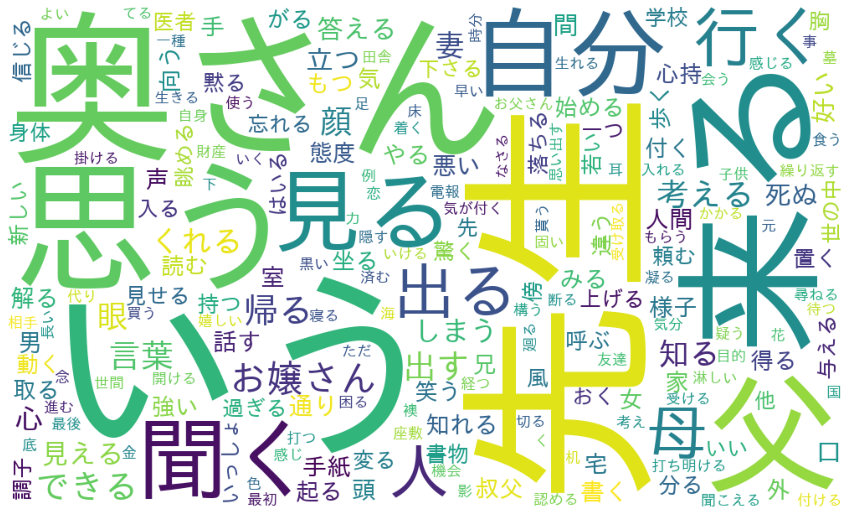

In [19]:
#@title WordCloud Settings { run: "auto" }
#@markdown  **<font color= "Crimson">注意</font>：実行する前に 設定してください。**</font> ※shape:cloudの形,  background_color:背景色,  colormap:文字のカラーリング

shape = 'Default' #@param ['Default', 'Donuts', 'Comment', 'Twitter', 'Biwako']
background_color = 'white' #@param ['white', 'whitesmoke', 'salmon', 'black']
colormap = 'viridis' #@param ['viridis','Accent','Dark2','RdYlBu','RdYlGn','Set1','Spectral','YlGnBu','binary','copper','terrain','twilight']

#wordcloud取込用に辞書型ヘ変換
dic_result = dict(result)

#ライブラリ
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import requests

#custom_maskセット
def mask_set(url,file_name):
  response = requests.get(url)
  image = response.content
  with open(file_name, "wb") as f:
    f.write(image)
  custom_mask = np.array(Image.open(file_name))
  return custom_mask 

if shape =='Donuts':
  custom_mask = mask_set('https://github.com/hima2b4/Word-Cloud/raw/main/donuts.png', 'donuts.png')

elif shape =='Comment':
  custom_mask = mask_set('https://github.com/hima2b4/Word-Cloud/raw/main/comment.png', 'comment.png')

elif shape =='Twitter':
  custom_mask = mask_set('https://github.com/hima2b4/Word-Cloud/raw/main/twitter.png', 'twitter.png')

elif shape =='Biwako':
  custom_mask = mask_set('https://github.com/hima2b4/Word-Cloud/raw/main/biwa.png', 'biwa.png')
  
else:
  custom_mask = None

#wordcloud実行
wordcloud = WordCloud(background_color=background_color, #'white',
#                      max_words=125,
                      mask=custom_mask,
                      colormap = colormap,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600
                      ).fit_words(dic_result)

#wordcloud表示
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **備考**

##WordCloudについて
WordCloudは、形態素解析により意味のある品詞の単語に絞り、単語を出現頻度に沿ったよっ大きさでランダムに表示した図です。
WordCloudは、カスタマーレビュー、アンケートの自由記述、書籍のテキスト、記事やニュース、議事録など、特に大量のテキストデータを扱う時、時間をかけずに全体を把握したいという場合に便利です。\
気になったワードを挙げ、その点についてテキストデータをより詳しく確認する等、効率的に自然言語分析を進めるベーシックな方法のひとつといえるでしょう。

##形態素分析について
自然言語のもっともシンプルな分析方法は単語の出現頻度です。出現頻度が多いということは、そのテキストの言いたいことだからです。 ただ言いたいことを読み取るには、文を単語に分割し、単語の品詞を明らかにし、動詞のように活用する単語を基本形に直したりする形態素解析を行う必要があります。分析においては、役に立たない助詞や助動詞等を取り除き、名詞、動詞、形容詞等の内容語だけに絞られることが多いです。

##青空文庫のデータと処理について
※青空文庫のデータは www.aozora.gr.jp にある「テキストファイル(ルビあり)」を利用します。curlコマンドでzipファイルをダウンロード、unzipコマンドで解凍し、tail,headコマンドで冒頭、末尾の注釈カットし、文章のみ切り出しています。
書籍により冒頭および末尾の注釈行数は異なりますので、これは個別に設定する必要があります。

https://qiita.com/5at00001040/items/d7867974d2fd1d21dbbf

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html